In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [26]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,wt score,dsbda score,cc score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df = df.rename(columns={
    "race/ethnicity": "race",
    "parental level of education": "parent_edu",
    "test preparation course": "test_course",
    "wt score": "wt_score",
    "dsbda score": "dsbda_score",
    "cc score": "cc_score"
})

In [28]:
df.isnull().sum()

gender         0
race           0
parent_edu     0
lunch          0
test_course    0
wt_score       0
dsbda_score    0
cc_score       0
dtype: int64

In [29]:
#outlier detection

66.0


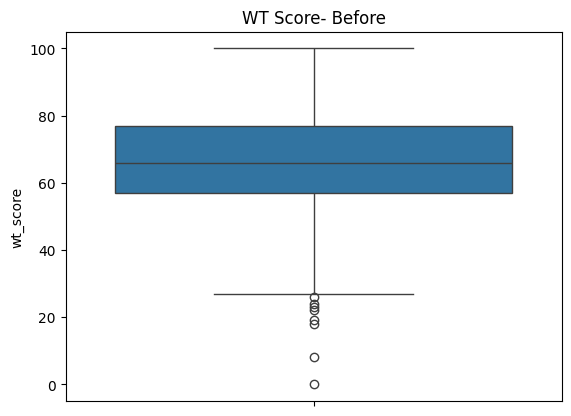

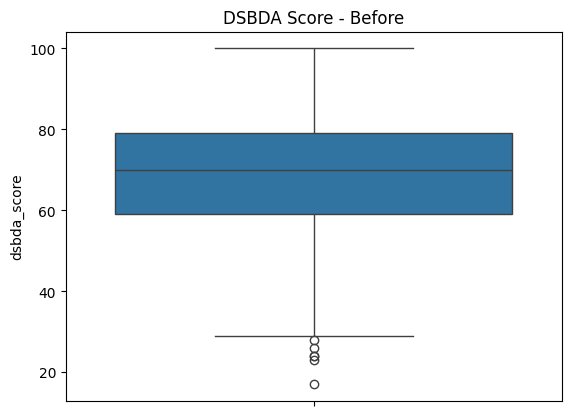

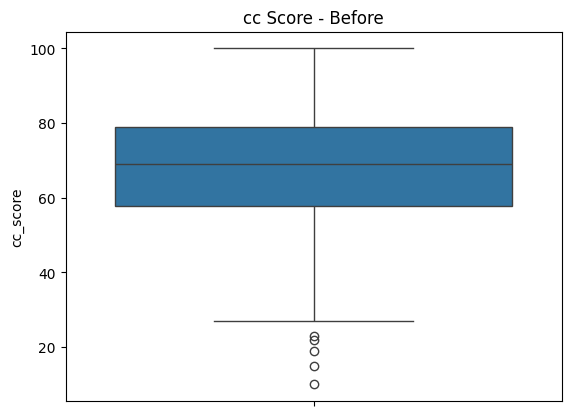

In [30]:
sns.boxplot(data=df['wt_score'], ).set_title('WT Score- Before')
print(df['wt_score'].median())
plt.show()
sns.boxplot(data=df["dsbda_score"], ).set_title("DSBDA Score - Before")
plt.show()
sns.boxplot(data=df["cc_score"], ).set_title("cc Score - Before")
plt.show()

In [31]:
df.shape

(1000, 8)

In [32]:
def remove_outliers_muliple(features):
    global df
    for feature in features:
        q1,q3=np.percentile(df[feature],[25,75])
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        df=df[(df[feature]>=lower) & (df[feature]<=upper)]

In [33]:
remove_outliers_muliple(['wt_score','dsbda_score','cc_score'])

In [34]:
df.shape

(986, 8)

66.5


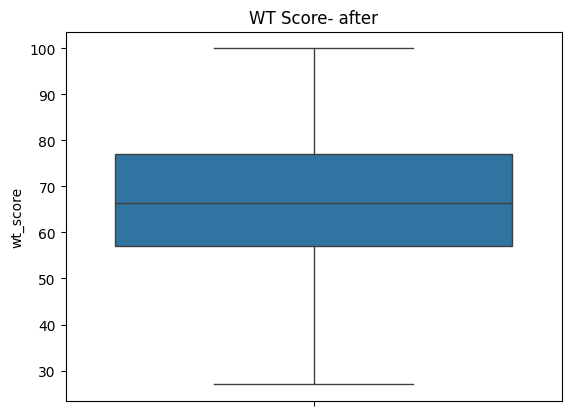

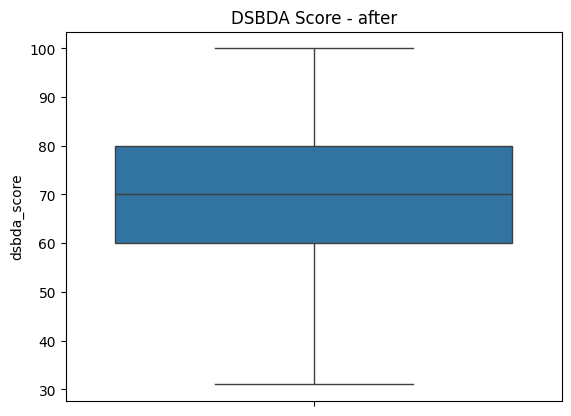

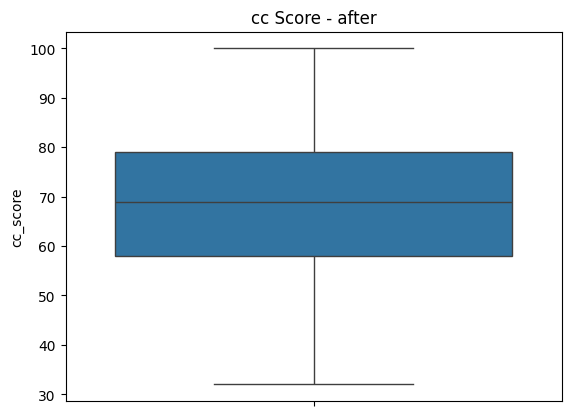

In [35]:
sns.boxplot(data=df['wt_score'], ).set_title('WT Score- after')
print(df['wt_score'].median())
plt.show()
sns.boxplot(data=df["dsbda_score"], ).set_title("DSBDA Score - after")
plt.show()
sns.boxplot(data=df["cc_score"], ).set_title("cc Score - after")
plt.show()

In [36]:
#MinMax normalization
def min_max_normalisation(features):
    for feature in features:
        df[feature+"_minmax"]=(df[feature]-df[feature].min())/(df[feature].max()-df[feature].min())

In [37]:
min_max_normalisation(["wt_score","dsbda_score","cc_score"])

In [38]:
df.head()

,gender,race,parent_edu,lunch,test_course,wt_score,dsbda_score,cc_score,wt_score_minmax,dsbda_score_minmax,cc_score_minmax
0,female,group B,bachelor's degree,standard,none,72,72,74,0.616438,0.594203,0.617647
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.855072,0.823529
2,female,group B,master's degree,standard,none,90,95,93,0.863014,0.927536,0.897059
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.273973,0.376812,0.176471
4,male,group C,some college,standard,none,76,78,75,0.671233,0.681159,0.632353


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[["wt_sc","ds_sc","cc_sc"]]=scaler.fit_transform(df[["wt_score","dsbda_score","cc_score"]])

In [40]:
df.head()

,gender,race,parent_edu,lunch,test_course,wt_score,dsbda_score,cc_score,wt_score_minmax,dsbda_score_minmax,cc_score_minmax,wt_sc,ds_sc,cc_sc
0,female,group B,bachelor's degree,standard,none,72,72,74,0.616438,0.594203,0.617647,0.616438,0.594203,0.617647
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.855072,0.823529,0.575342,0.855072,0.823529
2,female,group B,master's degree,standard,none,90,95,93,0.863014,0.927536,0.897059,0.863014,0.927536,0.897059
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.273973,0.376812,0.176471,0.273973,0.376812,0.176471
4,male,group C,some college,standard,none,76,78,75,0.671233,0.681159,0.632353,0.671233,0.681159,0.632353


In [42]:
#zscore
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[["wt_s__sc","ds_s__sc","cc+s__sc"]]=scaler.fit_transform(df[["wt_score","dsbda_score","cc_score"]])

In [44]:
df.head()

,gender,race,parent_edu,lunch,test_course,wt_score,dsbda_score,cc_score,wt_score_minmax,dsbda_score_minmax,cc_score_minmax,wt_sc,ds_sc,cc_sc,wt_s__sc,ds_s__sc,cc+s__sc
0,female,group B,bachelor's degree,standard,none,72,72,74,0.616438,0.594203,0.617647,0.616438,0.594203,0.617647,0.370131,0.163761,0.371152
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.855072,0.823529,0.575342,0.855072,0.823529,0.160831,1.458384,1.342041
2,female,group B,master's degree,standard,none,90,95,93,0.863014,0.927536,0.897059,0.863014,0.927536,0.897059,1.625930,1.818002,1.688787
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.273973,0.376812,0.176471,0.273973,0.376812,0.176471,-1.374034,-0.915092,-1.709324
4,male,group C,some college,standard,none,76,78,75,0.671233,0.681159,0.632353,0.671233,0.681159,0.632353,0.649197,0.595302,0.440501


In [45]:
def z_score(features):
    for feature in features:
        mean=df[feature].mean()
        std=df[feature].std()
        df[feature+"_z"]=(df[feature]-mean)/std

In [47]:
z_score(["wt_score","dsbda_score","cc_score"])

In [48]:
df.head()

,gender,race,parent_edu,lunch,test_course,wt_score,dsbda_score,cc_score,wt_score_minmax,dsbda_score_minmax,cc_score_minmax,wt_sc,ds_sc,cc_sc,wt_s__sc,ds_s__sc,cc+s__sc,wt_score_z,dsbda_score_z,cc_score_z
0,female,group B,bachelor's degree,standard,none,72,72,74,0.616438,0.594203,0.617647,0.616438,0.594203,0.617647,0.370131,0.163761,0.371152,0.369943,0.163678,0.370964
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.855072,0.823529,0.575342,0.855072,0.823529,0.160831,1.458384,1.342041,0.160750,1.457644,1.341360
2,female,group B,master's degree,standard,none,90,95,93,0.863014,0.927536,0.897059,0.863014,0.927536,0.897059,1.625930,1.818002,1.688787,1.625105,1.817079,1.687930
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.273973,0.376812,0.176471,0.273973,0.376812,0.176471,-1.374034,-0.915092,-1.709324,-1.373337,-0.914627,-1.708457
4,male,group C,some college,standard,none,76,78,75,0.671233,0.681159,0.632353,0.671233,0.681159,0.632353,0.649197,0.595302,0.440501,0.648868,0.595000,0.440278


In [50]:
df["wt_log"]=np.log1p(df["wt_score"])

In [51]:
df.head()

,gender,race,parent_edu,lunch,test_course,wt_score,dsbda_score,cc_score,wt_score_minmax,dsbda_score_minmax,...,wt_sc,ds_sc,cc_sc,wt_s__sc,ds_s__sc,cc+s__sc,wt_score_z,dsbda_score_z,cc_score_z,wt_log
0,female,group B,bachelor's degree,standard,none,72,72,74,0.616438,0.594203,...,0.616438,0.594203,0.617647,0.370131,0.163761,0.371152,0.369943,0.163678,0.370964,4.290459
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.855072,...,0.575342,0.855072,0.823529,0.160831,1.458384,1.342041,0.160750,1.457644,1.341360,4.248495
2,female,group B,master's degree,standard,none,90,95,93,0.863014,0.927536,...,0.863014,0.927536,0.897059,1.625930,1.818002,1.688787,1.625105,1.817079,1.687930,4.510860
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.273973,0.376812,...,0.273973,0.376812,0.176471,-1.374034,-0.915092,-1.709324,-1.373337,-0.914627,-1.708457,3.871201
4,male,group C,some college,standard,none,76,78,75,0.671233,0.681159,...,0.671233,0.681159,0.632353,0.649197,0.595302,0.440501,0.648868,0.595000,0.440278,4.343805


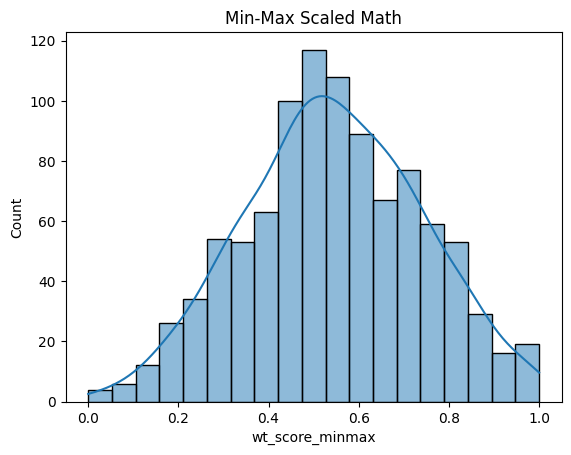

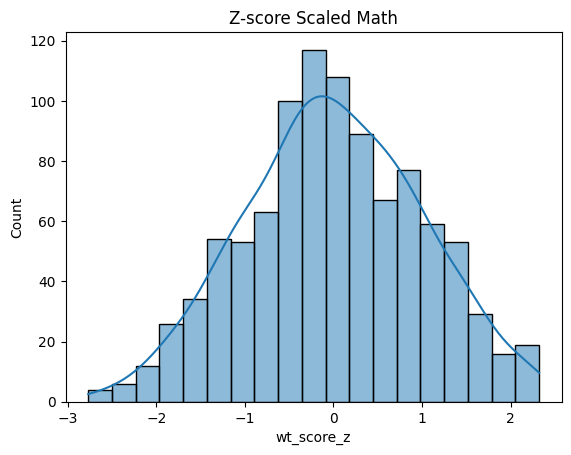

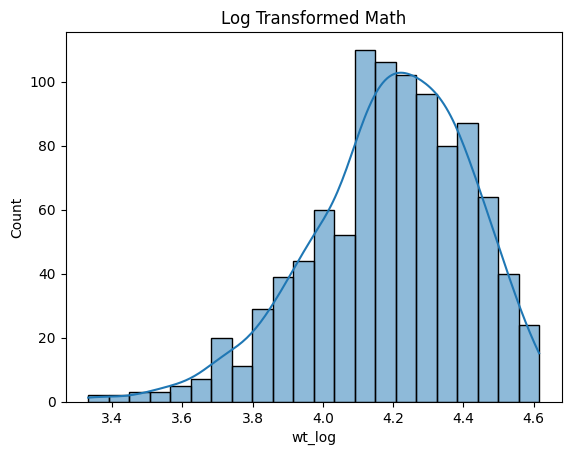

In [52]:
# 7. Visualization of Transformed Data
sns.histplot(df["wt_score_minmax"], kde=True, ).set_title("Min-Max Scaled Math")
plt.show()
sns.histplot(df["wt_score_z"], kde=True, ).set_title("Z-score Scaled Math")
plt.show()
sns.histplot(df["wt_log"], kde=True, ).set_title("Log Transformed Math")
plt.show()